# 02806 Social data analysis and visualization

## Assignment 1 

##### Libraries

Importing the libraries:

In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
import pdb
import json
import plotly.express as px
import calendar
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

### Part 1: Temporal Patterns

**Exercise**: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [3]:
#Picking the filename to import into a pandas dataframe
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

#Importing the dataset
filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'Datasets', fileName))
df = pd.read_csv(filePath)

#Removing the 2018 (since we don't have full data for 2018)
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
df2 = df[df['Year'] != '2018'].copy() # drop rows corresponding to 2018

#For the exercise below, we look only at the following focus-crimes
focuscrimes = (set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))

> * **Weekly patterns**. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [4]:
# Order the Day-of-Week column
df2['DayOfWeek'] = pd.Categorical(df2['DayOfWeek'],categories=[
                    'Monday','Tuesday','Wednesday','Thursday',
                    'Friday','Saturday','Sunday'],ordered=True)

focuscrimes_lst = [ 'WEAPON LAWS', 'DRUNKENNESS',
                    'TRESPASS','PROSTITUTION',
                    'DRIVING UNDER THE INFLUENCE','BURGLARY',
                    'ROBBERY','DRUG/NARCOTIC',
                    'LARCENY/THEFT','DISORDERLY CONDUCT',
                    'VANDALISM', 'VEHICLE THEFT',
                    'ASSAULT', 'STOLEN PROPERTY']

focuscrimes_lst.sort()

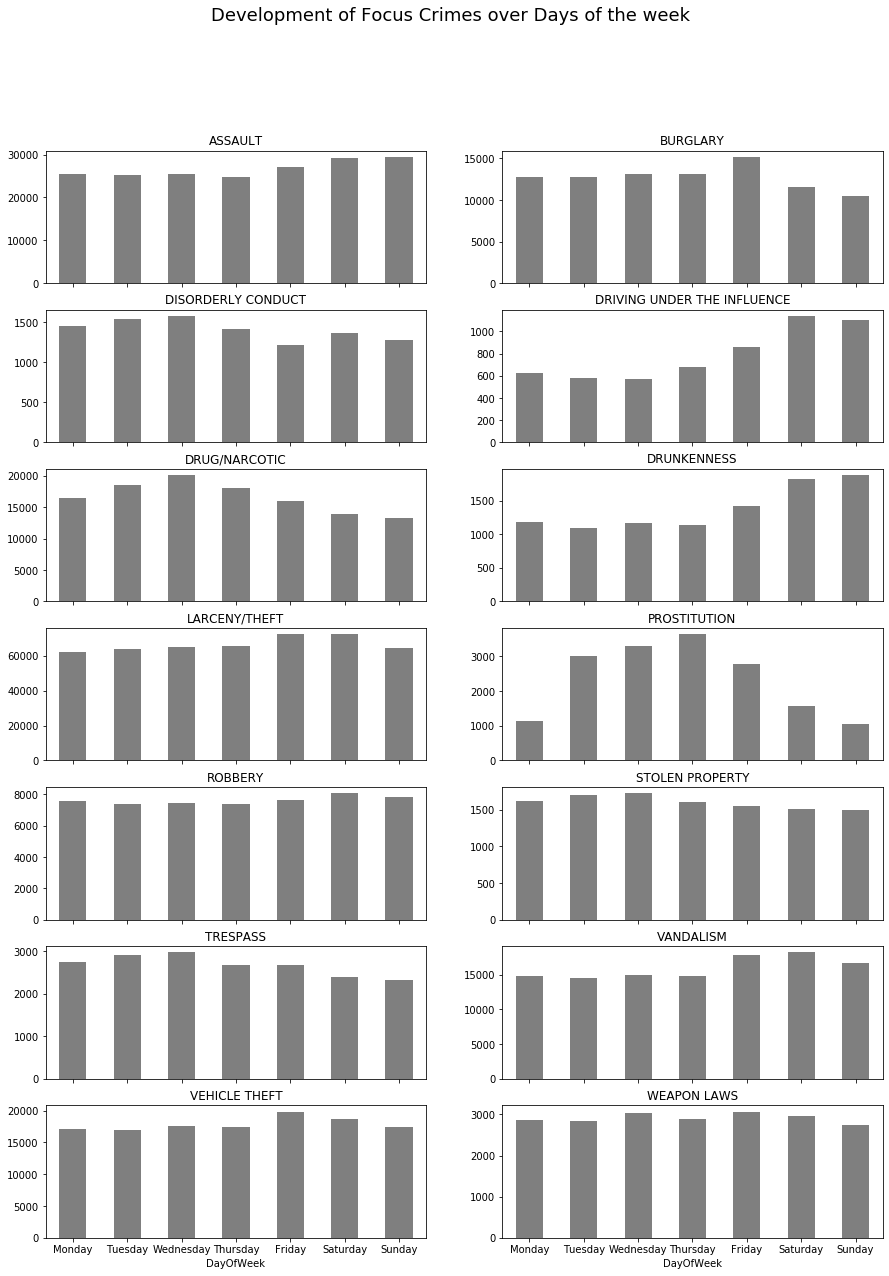

In [5]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Days of the week', fontsize=18)
group_count = df2.groupby(['Category','DayOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')

**Comments:** 

Above one can see the *weekly patterns of certain focus crimes in San Francisco PD*. 

Weekends is usually considered the rest time period of the week, where the the majority of the San Francisco citizens end their 9-5 weekly work. Due to that, over the weekend, a justified spike of rise is observed in certain "low level" crimes like the **Drunkeness** and **Driving under the Influence** types of crimes. We would expect **Disorderly Conduct** to spike at weekends, but there has been many records of the crime of the week too. A more serious type of crime, **Vandalism** is finding its place also on the weekend, more specifically on Fridays and Saturdays. **Assault** see also a spike over the weekend. 

However, **crimes related to thievery** tend to happen more in the duracion of the week, because (probably) the police alertness (as well as the households owners) over the weekend could play an important role for the offenders. Crimes like **Burglary**, **Stolen Property** and **Tresspass** see their spike over the week and lower at weekends. **Drug/narcotic** distributions arrests happen more also over the week and not during the weekends. 

**Prostitution** related crime arrests happen mainly throught the week, in an attempt for the police force to handle the sex workers of San Franscisco. To shed some light, in 2016, as sex workers engaged in ongoing negotiations with the San Francisco Police Department (SFPD) and the District Attorney surrounding the amnesty policy, law enforcement agencies across the San Francisco Bay Area — including the San Francisco Police Department — **found themselves deeply embroiled in a police sex scandal of seismic proportions**. More can be read [here](https://nextcity.org/daily/entry/how-sex-workers-made-san-francisco-safer-for-everyone).

Other crime activities seem to happen every day on a constant rate.

>* **The months**. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [6]:
df2['Month_Numeric'] = pd.to_datetime(df2['Date']).dt.month
df2['Month'] = df2['Month_Numeric'].apply(lambda x: calendar.month_abbr[x])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec',]
df2['Month'] = pd.Categorical(df2['Month'], categories=months, ordered=True)

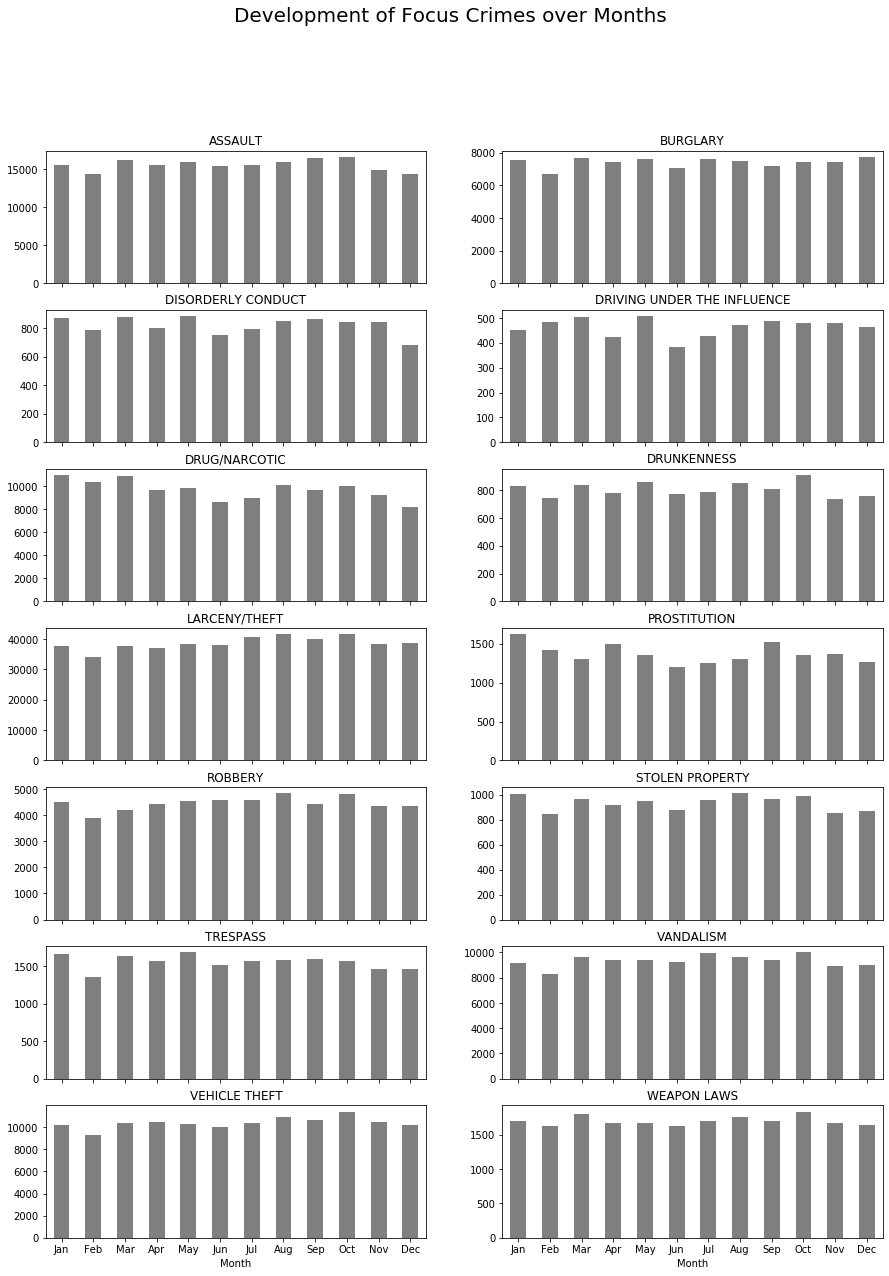

In [7]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Months', fontsize=20)
group_count = df2.groupby(['Category','Month'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')

**Comments:**

Above one can see the *monthly patterns of certain focus crimes in San Franscisco PD*.

A *certain pattern* can be seen in crimes: **Driving under the infuence**, **Disorderly conduct**, **Drug/narcotic** and **Prostitution**. More specifically, in the month **June** a sudden decline of PD records tend to happen in this specific month. For the case of **Prostitution** the decline continues for the whole summer, only to see a spike again on September. 

The other type of crimes, one could say, they fluctuate during the months without a specific noticable pattern. **Assault** records, tend to happen less during the end of the year, on months November and December.

>* **The 24 hour cycle**. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [8]:
df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour
df2['Hour'] = df2['Hour'].apply(lambda x: str(x)+"-"+str(x+1))
hours = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13',
        '13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']
df2['Hour'] = pd.Categorical(df2['Hour'], categories=hours, ordered=True)

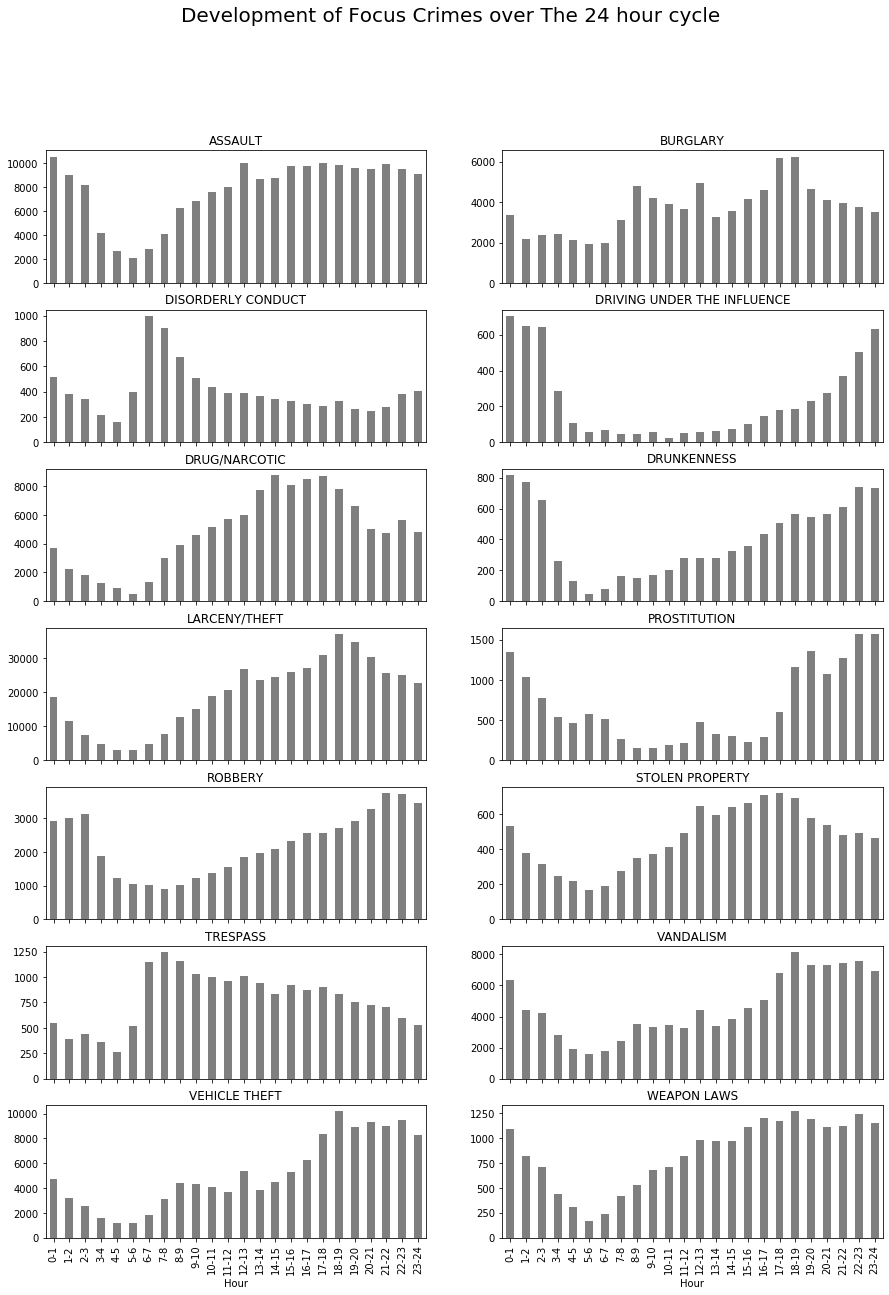

In [9]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over The 24 hour cycle', fontsize=20)
group_count = df2.groupby(['Category','Hour'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')

**Comments:**

Above one can see the *hourly patterns of certain focus crimes in San Francisco PD*.

Overall, many crimes tend to have a (justified) spike around the **midnight hours**. Those crimes are: **Assault** (an all time high at midnight following until 4 am), **Driving under the influence** (records mostly happen between 11pm to 4am), **Drunkeness** (linear increase throughtout the day with peak at hours 10pm - 3am), **Prostitution** (mostly around 10pm - 4am) and **Robbery** (peak 9pm-3pm).

A few crimes can find their peak hours **at midday to evening**. **Burglary** understandably peak at morning hours (8-9am), midday(12pm) as well as evening hours at 6-8pm.  **Drug/narcotics** dealers peak at evening hours at 2pm but high activity is observed throughout the whole evening. **Latency/Theft** as well as **Stolen Property** both peak around midday, only to increase in the evening hours. Lastly, both **Vandalism** and **Vehicle Theft** peak mostly at evening hours around 6pm-10pm.

Lastly, **Disorderly conduct** as well as **Tresspass** happen mainly at moning hours (7-9am) and gradually lower throughout the rest of the day.

> * **Hours of the week**. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [10]:
#Function to return the day as a numeric number 1-7 accordingly
def day_to_num(x):
    if(x=='Monday'): return 1
    elif(x=='Tuesday'): return 2
    elif(x=='Wednesday'): return 3
    elif(x=='Thursday'): return 4
    elif(x=='Friday'): return 5
    elif(x=='Saturday'): return 6
    elif(x=='Sunday'): return 7
    else: return -1

#Computing the 168 hours of the week
df2['DayOfWeek_Numeric'] = df2['DayOfWeek'].apply(lambda x : day_to_num(x)).astype('int64')
df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour
h_v   = df2['Hour'].values 
d_v   = df2['DayOfWeek_Numeric'].values
df2['HourOfWeek'] =  (h_v + ((d_v-1)*24) )

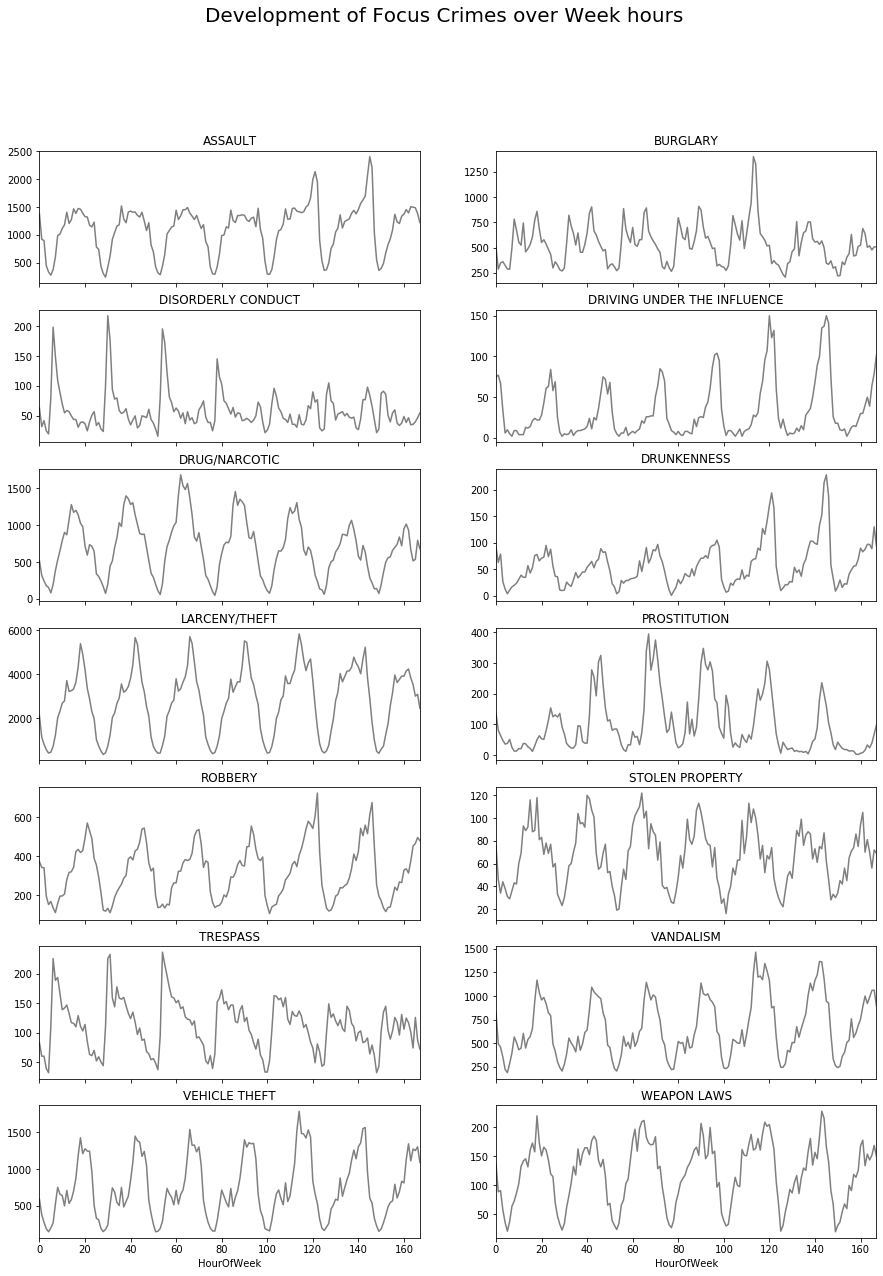

In [11]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Week hours', fontsize=20)
group_count = df2.groupby(['Category','HourOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(ax=ax, color= 'tab:gray')

**Comments:**

Above one can see the *weekly hour patterns of certain focus crimes in San Francisco PD*.

Once again we notice the daily trends *mentioned above* with some better insights about **Burglary**. Burglary peaks highly at Friday, with over the double comparing to other peak weekly hours over the week. Something that is highly understandable as people tend to go outside on friday night (before COVID! | -2017). **Disorderly conduct** and **Trespass** happen mostly on weekly hours on Mondays-Tuesdays-Wednesdays.

### Part 2: Thinking about data and visualization

**Excercise:** Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

This the Pearsons correlation is the covariance of two variables, divided by the product of their standard deviations. That is the reason the Pearsons Correlation Coefficience is a normalised coefficience such that it has a range between -1 and 1.  The Pearson Correlation Coefficience applied for a sample is the following:

$r_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}$

One example where visualization works better, instead of a Pearsons correlation, is to **better detect outliers in the data** with the form of visualizing. Typically Pearsons corellation gives an output of range [-1, 1] indicating *how* linearly correlated the measured data are but we dont have an idea of any existed outliers between these two sets of data. By removing false values and ourliers, the Pearson correlation will give a greater number (close to 1). 

> * What is the difference between a bar-chart and a histogram?

On the **bar-chart**, when we have a lot of values in the **x-axis**, the chart becomes too "crowdy" leaving us unable to draw many insights. Instead of simplyfing statistics the user has to digg further into to graph to draw insights. However, to better understand the trends, we can use a **histogram**. 

In histogram we define some bins and we define the number of values we see in those bins. Drawing insights from those bins is also critical to choose a right bin-size, this can make a histogram extremely insightful or on the other side hide information or even worse depict a wrongly stastistic.

Into the differences between the two, the histogram refers to a graphical representation which displays data by means of bars in order to display a numerical data frequency, while the bar graph is a graphical representation of data which uses bars in order to compare various data categories. In histogram it is crusial not not change the order of the blocks, whereas in barcharts one can easily do (ascending or descending order is a common representation of various bar charts). Histogram is used for non-discrete variable distribution, while Bar Graph is used to compare discrete variables. Generally, Histograms are used to show distributions of variables while bar charts are used to compare variables. Finally, Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical. data


>* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

**NEEDS FIX**

One criterion is [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule). It is designed to minimize the difference between the area under the empirical probability distribution and the area under the theoretical probability distribution.
The general eq. is: 
$\operatorname{Bin}$ width $=2 \frac{\operatorname{IQR}(x)}{\sqrt[3]{n}}$, 
where IQR is the interquartile range of the data and n is the number of observations in the sample $x$.

Abduls answer:

See: https://www.statisticshowto.com/choose-bin-sizes-statistics/
    - Bins should be all the same size. For example, groups of ten or a hundred.
    - Bins should include all of the data, even outliers. If your outliers fall way outside of your other data,
      consider lumping them in with your first or last bin. This creates a rough histogram —make sure you note where outliers are being included.
    - Boundaries for bins should land at whole numbers whenever possible (this makes the chart easier to read).
    - Choose between 5 and 20 bins. The larger the data set, the more likely you’ll want a large number of bins.
      For example, a set of 12 data pieces might warrant 5 bins but a set of 1000 numbers will probably be more useful with 20 bins. 
      The exact number of bins is usually a judgment call.
    - If at all possible, try to make your data set evenly divisible by the number of bins.
      For example, if you have 10 pieces of data, work with 5 bins instead of 6 or 7.

### Part 3: Generating important plot types

**Excercise**: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

> * First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

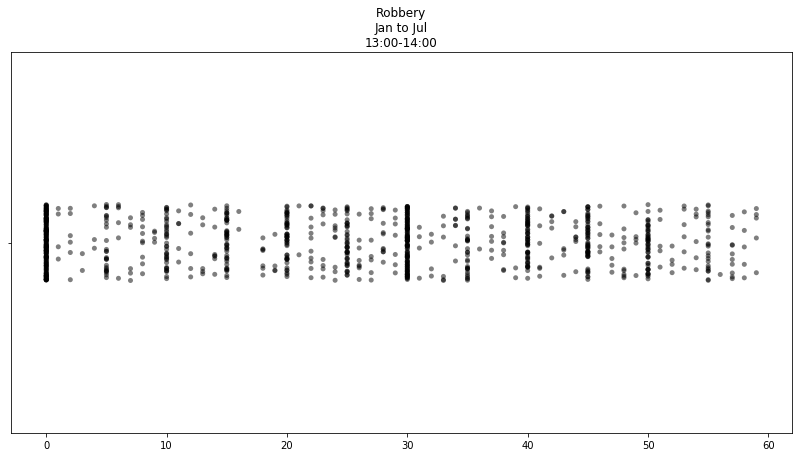

In [12]:
"""
Crime = ROBBERY # imperically: gives one of best figures from Focus Crimes
Month = from Jan to Jul. 
Hour  = 13 - 14  
Time -> Minutes 

Data  = focus crimes & != 2018
"""

data_Jit = df2[df2['Category']=='ROBBERY'] 
data_Jit = data_Jit[data_Jit['Month_Numeric']<=6]
data_Jit = data_Jit[data_Jit['Hour']==13].reset_index(drop=True)
data_Jit['Time'] = pd.to_datetime(data_Jit['Time']).dt.minute


plt.figure(figsize=(14, 7))
sns.stripplot(data_Jit['Time'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k').set_title('Robbery\nJan to Jul\n13:00-14:00')
plt.show()

> * Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

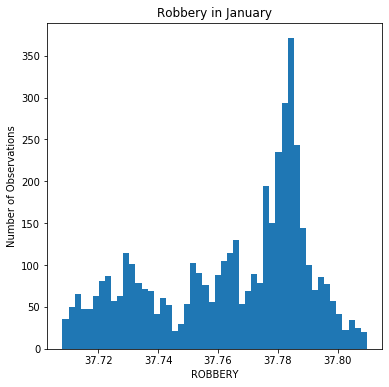

In [13]:
"""
Histogram 01
Crime = ROBBERY
Month = Jan 

Data  = focus crimes & != 2018
"""

data_hist1 = df2[df2['Category'] == 'ROBBERY']
data_hist1 = data_hist1[data_hist1['Month_Numeric']==1]

plt.figure(figsize=(6, 6))
plt.hist(data_hist1['Y'], bins=50) # uses numpy.histogram
plt.title("Robbery in January")
plt.xlabel("ROBBERY")
plt.ylabel("Number of Observations")
plt.show()                                                       

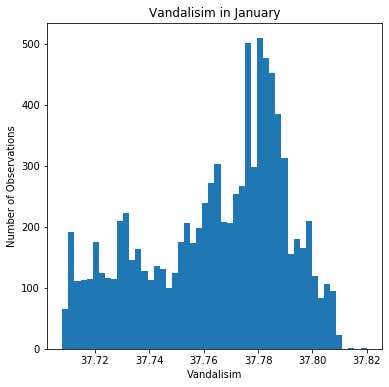

In [14]:
"""
Histogram 01
Crime = VANDALISM 
Month = Jan 

Data  = focus crimes & != 2018
"""
data_hist2 = df2[df2['Category'] == 'VANDALISM']
data_hist2 = data_hist2[data_hist2['Month_Numeric']==1]

plt.figure(figsize=(6, 6))
plt.hist(data_hist2['Y'], bins=50) # uses numpy.histogram
plt.title("Vandalisim in January")
plt.xlabel("Vandalisim")
plt.ylabel("Number of Observations")
plt.show()    

### Part 4: A bit of geo-data

#### Create a Folium map instance for the city of San Francisco and add a marker for the City Hall coordinates.

In [15]:
# Create New Map Instance
mapSF1 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 13)

# Add Marker for the City Hall to Map
folium.Marker([37.77919, -122.41914],
              popup='City Hall',
              icon=folium.Icon(color='blue',
                            icon='university',
                            prefix='fa')).add_to(mapSF1)

# Display Map
mapSF1

#### Visualize selected crime incidents for a time period of interest.

In [16]:
#==============INPUT VARIABLES=====================
crime = 'DRUG/NARCOTIC'     # pick a crime category
start_date = '2015-06-01'   # format: yyyy-mm-dd
end_date = '2015-07-01'     # format: yyyy-mm-dd
#==================================================

# Create a filtered dataframe based on new preferences
df['Date'] = pd.to_datetime(df['Date'])
df2Map = df.loc[(df['Date'] >= start_date)
                &(df['Date'] <= end_date)
                &(df['Category']==crime)].copy()

# Create New Map instance
mapSF2 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 12)

# Add Makers to the map (based on preferences from above)
for i, row in df2Map.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=1,
                        popup=row['Date'].date(),
                        color='red').add_to(mapSF2)
mapSF2

### Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

> ***Exercise*: Data errors.** The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.
>
> The exercise is simply this:
> * For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Indeed, when one look at the data, there is one irreplacable "noise" in them. The noise that is created by human activity while logging the data in the computer the police officers during their workhours. 

Being more specific, **in the hourly activity for `PROSTITUTION`**, the San Frasisco police officer (most probably) falsely recorded the time of the event from 12 in the midnight to 12 in the midday hour. This can bias the binned version of the data and depict an overall (falsely) impression that leads to the fact that arrests have been made in plain midday as naively someone can think that prostition in San Frasisco happen at plain day. This is not the case.

In the second example, **while investigating the details of how the timestamps are recorded** in jitter-plots, police officers while communicating on RF will most certainly - as we all do - simplify regarding the minutes of the hour for  reasons like simplicity, time-saving and the importancy of the exact hour in minutes regarding to the event itself. Thus, this inaccuracy can also depict a false impression, that the crimes are happening mostly in whole increments of 10, so a careful interpretion is important. 

Lastly, as offences are reported at a police station near the **Hall of Justice**, it could generate a perception that the Hall of Justice is a go-to spot for prostitution. In fact, these offences may have occurred in multiple locations and were then reported at a police station near the Hall of Justice. 

All of the examples above, is part of human mistakes and carefully interpretetion is required in order to avoid wrong impressions.